# Factor Analysis for clusters generated by the K-Means algorithm

In [20]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import matplotlib.pyplot as plt

#First the unnecessary columns are removed:

df = pd.read_excel('Asansol MRBQ Data.xlsx')
df = df.drop(columns = ['TOT2'])

df_2 = pd.read_excel('clustered_data_kmeans.xlsx')

clusters = list(df_2['Cluster'])

df['Cluster'] = clusters
df

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
0,6,5,6,3,6,7,7,1,6,6,...,2,1,6,2,2,6,7,2,4,0
1,4,4,3,2,2,5,2,1,1,3,...,1,4,3,4,3,4,3,3,3,1
2,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,0
3,1,1,2,6,2,1,1,1,2,1,...,2,2,1,1,1,2,1,2,2,1
4,4,7,4,6,6,4,4,3,3,3,...,7,1,7,1,3,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5,1,5,3,5,3,1,1,5,2,...,1,5,2,1,5,3,1,3,3,0
477,6,7,5,5,6,5,1,1,5,1,...,1,6,2,1,5,1,1,2,2,0
478,2,4,3,3,6,2,1,1,4,2,...,1,5,2,1,2,2,1,1,1,1
479,5,7,5,5,7,3,2,1,5,1,...,2,6,2,1,5,2,1,3,2,0


## Factor Analysis on the first cluster 

In [21]:
# Only the rows containing the first cluster are filtered out.

cluster_1 = df.loc[df['Cluster']==0]
cluster_1

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
0,6,5,6,3,6,7,7,1,6,6,...,2,1,6,2,2,6,7,2,4,0
2,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,0
4,4,7,4,6,6,4,4,3,3,3,...,7,1,7,1,3,1,3,1,3,0
5,4,4,6,6,5,7,5,6,5,6,...,7,6,6,5,5,5,6,6,6,0
9,2,3,5,6,5,4,2,6,2,3,...,4,5,5,6,5,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,6,7,1,1,6,1,1,1,6,1,...,1,5,3,1,4,4,1,3,3,0
476,5,1,5,3,5,3,1,1,5,2,...,1,5,2,1,5,3,1,3,3,0
477,6,7,5,5,6,5,1,1,5,1,...,1,6,2,1,5,1,1,2,2,0
479,5,7,5,5,7,3,2,1,5,1,...,2,6,2,1,5,2,1,3,2,0


In [22]:
# The 'Cluster' column can now be dropped.

cluster_1 = cluster_1.drop(columns=['Cluster'])
cluster_1

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
0,6,5,6,3,6,7,7,1,6,6,...,6,2,1,6,2,2,6,7,2,4
2,6,7,6,5,3,4,1,1,4,1,...,5,1,5,5,1,6,6,1,6,6
4,4,7,4,6,6,4,4,3,3,3,...,3,7,1,7,1,3,1,3,1,3
5,4,4,6,6,5,7,5,6,5,6,...,5,7,6,6,5,5,5,6,6,6
9,2,3,5,6,5,4,2,6,2,3,...,6,4,5,5,6,5,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,6,7,1,1,6,1,1,1,6,1,...,6,1,5,3,1,4,4,1,3,3
476,5,1,5,3,5,3,1,1,5,2,...,5,1,5,2,1,5,3,1,3,3
477,6,7,5,5,6,5,1,1,5,1,...,6,1,6,2,1,5,1,1,2,2
479,5,7,5,5,7,3,2,1,5,1,...,5,2,6,2,1,5,2,1,3,2


In [23]:
# Next the KMO (Kiaser-Meyer-Olkin) test was used to determine whether the cluster is suitable for factor analysis
# The closer the overall KMO is to 1, the better suited the dataset.

kmo_all, kmo_model = calculate_kmo(cluster_1)

print("KMO per variable:", kmo_all)
print("Overall KMO:", kmo_model)

# Since the cluster has a reasonable KMO value, going ahead with the Factor Analysis

KMO per variable: [0.92249339 0.92014872 0.9437448  0.94130737 0.91937955 0.92317446
 0.92369396 0.93730494 0.95132451 0.95071503 0.73627764 0.73299976
 0.93792303 0.91685617 0.88645854 0.94908475 0.90367562 0.9361118
 0.95071816 0.91025198 0.93345857 0.90861182 0.89489502 0.85779242
 0.81977292 0.85848978 0.95290081 0.93710477 0.92817949 0.92879184
 0.91599808 0.94361222 0.93898235 0.95165773 0.88807709 0.88119415]
Overall KMO: 0.9175027309270943


In [24]:
# The original correlation matrix for the first cluster:
cluster_1.corr()

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
Q 1,1.000000,0.617037,0.539672,0.471242,0.671339,0.360645,-0.002480,-0.099718,0.480261,0.027766,...,0.573202,-0.112579,0.554604,0.232074,0.005356,0.553349,0.250558,-0.025234,0.279219,0.267480
Q 2,0.617037,1.000000,0.416335,0.363023,0.576214,0.316892,0.020002,-0.076959,0.284289,-0.028929,...,0.359204,-0.077968,0.449507,0.240332,-0.066609,0.406401,0.087713,-0.045504,0.215062,0.234737
Q 3,0.539672,0.416335,1.000000,0.730530,0.539815,0.706986,0.405280,0.256366,0.432590,0.309980,...,0.494955,0.230663,0.454837,0.430308,0.407629,0.517115,0.473065,0.306055,0.419453,0.423848
Q 4,0.471242,0.363023,0.730530,1.000000,0.520602,0.717435,0.338445,0.316043,0.388356,0.299129,...,0.441717,0.298019,0.461570,0.479054,0.369526,0.544021,0.435434,0.316187,0.460009,0.476217
Q 5,0.671339,0.576214,0.539815,0.520602,1.000000,0.446248,0.058987,0.030064,0.534132,0.093342,...,0.571627,0.080832,0.662417,0.310482,0.087060,0.613316,0.326989,0.086201,0.331260,0.361453
Q 6,0.360645,0.316892,0.706986,0.717435,0.446248,1.000000,0.441172,0.360753,0.303838,0.424842,...,0.399358,0.394976,0.366949,0.519244,0.538398,0.449529,0.464282,0.425721,0.417567,0.463138
Q 7,-0.002480,0.020002,0.405280,0.338445,0.058987,0.441172,1.000000,0.428578,0.131355,0.525646,...,0.118930,0.469956,-0.082607,0.349045,0.553831,0.144144,0.320625,0.513976,0.297512,0.269868
Q 8,-0.099718,-0.076959,0.256366,0.316043,0.030064,0.360753,0.428578,1.000000,0.070301,0.462033,...,0.040536,0.643321,-0.086396,0.389885,0.558346,0.118304,0.365825,0.617753,0.354112,0.353763
Q 9,0.480261,0.284289,0.432590,0.388356,0.534132,0.303838,0.131355,0.070301,1.000000,0.182933,...,0.568844,0.106932,0.529450,0.284987,0.168689,0.469453,0.388280,0.088558,0.393274,0.364567
Q 10,0.027766,-0.028929,0.309980,0.299129,0.093342,0.424842,0.525646,0.462033,0.182933,1.000000,...,0.140296,0.483956,-0.001171,0.343648,0.526337,0.153165,0.405788,0.483406,0.323608,0.293033


In [25]:
# The eigenvalues are calculated for the first cluster

fa_1 = FactorAnalyzer(n_factors=3, rotation='oblimin').fit(cluster_1)
fa_1.loadings_

eigenvalues, _ = fa_1.get_eigenvalues()
eigen_values = list(eigenvalues)

data_ev = pd.DataFrame(eigen_values,columns=['Eigenvalues'])

data_ev

# In this case, since the first 6 eigenvalues are greater than 1, the no. of factors is take to be 6.

,Eigenvalues
0,11.547072
1,5.805444
2,2.074053
3,1.781625
4,1.388583
5,1.121471
6,0.973549
7,0.948318
8,0.804998
9,0.699524


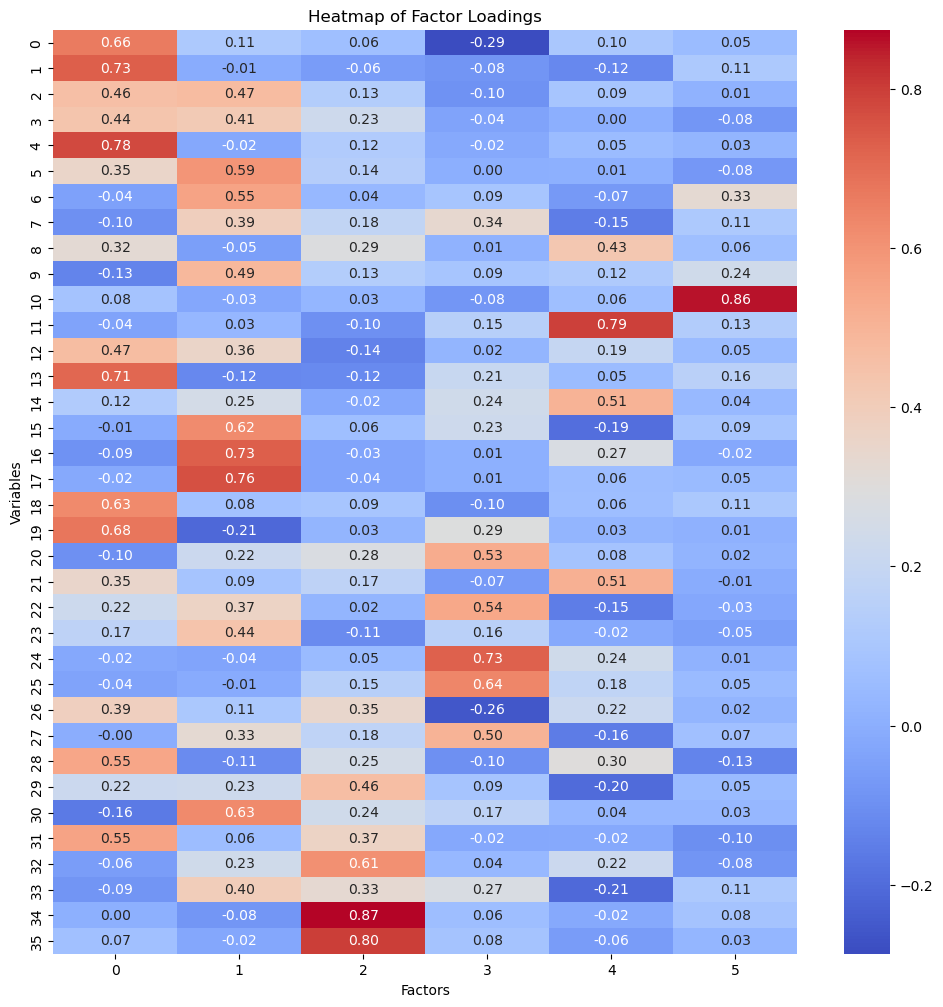

In [26]:
# The factor loadings for the 6 Factors are presented in the form of a heatmap:

fa_2 = FactorAnalyzer(n_factors=6, rotation='oblimin').fit(cluster_1)
loadings = fa_2.loadings_

plt.figure(figsize=(12, 12)) 
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

In [27]:
corr_mat_factors_1 = pd.DataFrame(fa_2.phi_)
corr_mat_factors_1

# The correlation matrix between the 9 Factors themselves:

,0,1,2,3,4,5
0,1.000000,0.142416,0.100845,0.439169,0.201029,0.370414
1,0.142416,1.000000,0.304495,0.400534,0.119903,-0.110759
2,0.100845,0.304495,1.000000,0.119508,0.099871,0.011169
3,0.439169,0.400534,0.119508,1.000000,0.127996,0.299919
4,0.201029,0.119903,0.099871,0.127996,1.000000,0.229871
5,0.370414,-0.110759,0.011169,0.299919,0.229871,1.000000


## Factor Analysis on second cluster 

In [28]:
# Only the rows belionging to the 2nd cluster are filtered out.

cluster_2 = df.loc[df['Cluster']==1]
cluster_2

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36,Cluster
1,4,4,3,2,2,5,2,1,1,3,...,1,4,3,4,3,4,3,3,3,1
3,1,1,2,6,2,1,1,1,2,1,...,2,2,1,1,1,2,1,2,2,1
6,6,7,6,5,3,4,1,1,4,1,...,1,5,5,1,6,6,1,6,6,1
7,1,2,1,1,2,6,3,1,2,1,...,1,3,1,3,4,2,1,2,6,1
8,7,6,7,3,3,3,1,4,6,7,...,1,1,1,4,1,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4,4,3,3,6,2,1,1,4,2,...,1,6,2,1,1,1,1,1,1,1
467,6,6,5,5,6,6,2,1,5,1,...,1,5,2,1,5,1,1,1,1,1
468,5,7,1,1,6,1,1,1,6,1,...,1,5,3,1,4,4,1,3,2,1
472,3,3,3,3,6,2,1,1,4,2,...,1,6,2,1,1,1,1,1,1,1


In [29]:
# Now the column 'Cluster' may be dropped from the dataset.

cluster_2 = cluster_2.drop(columns=['Cluster'])
cluster_2

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
1,4,4,3,2,2,5,2,1,1,3,...,3,1,4,3,4,3,4,3,3,3
3,1,1,2,6,2,1,1,1,2,1,...,1,2,2,1,1,1,2,1,2,2
6,6,7,6,5,3,4,1,1,4,1,...,5,1,5,5,1,6,6,1,6,6
7,1,2,1,1,2,6,3,1,2,1,...,2,1,3,1,3,4,2,1,2,6
8,7,6,7,3,3,3,1,4,6,7,...,7,1,1,1,4,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4,4,3,3,6,2,1,1,4,2,...,2,1,6,2,1,1,1,1,1,1
467,6,6,5,5,6,6,2,1,5,1,...,5,1,5,2,1,5,1,1,1,1
468,5,7,1,1,6,1,1,1,6,1,...,5,1,5,3,1,4,4,1,3,2
472,3,3,3,3,6,2,1,1,4,2,...,2,1,6,2,1,1,1,1,1,1


In [30]:
# Next the KMO (Kiaser-Meyer-Olkin) test was used to determine whether the cluster is suitable for factor analysis
# The closer the overall KMO is to 1, the better suited the dataset.

kmo_all, kmo_model = calculate_kmo(cluster_2)

print("KMO per variable:", kmo_all)
print("Overall KMO:", kmo_model)

# Since the cluster has a reasonable KMO value, going ahead with the Factor Analysis

KMO per variable: [0.94724168 0.89757106 0.92688631 0.91725556 0.90840811 0.92734308
 0.88659728 0.89041509 0.89187531 0.8796434  0.59887007 0.81648569
 0.92829845 0.85693417 0.84732687 0.90387876 0.87323084 0.88722939
 0.91228373 0.81899539 0.91948366 0.89052327 0.77204391 0.7548216
 0.77800724 0.84505188 0.90257212 0.88828628 0.87594508 0.93753445
 0.89585411 0.93100211 0.91560422 0.86149552 0.77349264 0.74342962]
Overall KMO: 0.883294531621906


In [31]:
# The original correlation matrix for the second cluster:
cluster_2.corr()

,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,Q 10,...,Q 27,Q 28,Q 29,Q 30,Q 31,Q 32,Q 33,Q 34,Q 35,Q 36
Q 1,1.000000,0.664664,0.637286,0.524543,0.647314,0.544844,0.289927,0.078634,0.442259,0.244619,...,0.610950,0.090319,0.611226,0.412320,0.235707,0.626666,0.474894,0.056031,0.291283,0.223213
Q 2,0.664664,1.000000,0.379548,0.306624,0.636012,0.355250,0.019235,-0.091656,0.355985,0.021629,...,0.548396,-0.076574,0.631159,0.229696,-0.029549,0.423094,0.191540,-0.121077,0.151530,0.118194
Q 3,0.637286,0.379548,1.000000,0.766676,0.573371,0.728968,0.464341,0.322640,0.429350,0.462435,...,0.572415,0.241392,0.480006,0.481413,0.502288,0.555972,0.592023,0.283788,0.320930,0.249428
Q 4,0.524543,0.306624,0.766676,1.000000,0.496042,0.682751,0.460842,0.330848,0.291273,0.372485,...,0.432387,0.334973,0.373459,0.444958,0.425062,0.503366,0.491887,0.196584,0.270391,0.196295
Q 5,0.647314,0.636012,0.573371,0.496042,1.000000,0.530108,0.245034,0.062885,0.528238,0.181184,...,0.686317,0.132156,0.751482,0.297219,0.221700,0.521231,0.301693,0.053615,0.102556,0.068805
Q 6,0.544844,0.355250,0.728968,0.682751,0.530108,1.000000,0.554484,0.374032,0.323820,0.457263,...,0.488431,0.459378,0.430389,0.532146,0.586572,0.526587,0.563412,0.366504,0.293802,0.308740
Q 7,0.289927,0.019235,0.464341,0.460842,0.245034,0.554484,1.000000,0.483699,0.145946,0.532369,...,0.318000,0.585716,0.068379,0.505340,0.639744,0.356786,0.507439,0.532506,0.283401,0.234877
Q 8,0.078634,-0.091656,0.322640,0.330848,0.062885,0.374032,0.483699,1.000000,0.159515,0.460638,...,0.147862,0.511176,-0.162373,0.413844,0.488592,0.301112,0.419456,0.446100,0.174665,0.173268
Q 9,0.442259,0.355985,0.429350,0.291273,0.528238,0.323820,0.145946,0.159515,1.000000,0.217334,...,0.494326,0.095065,0.416687,0.306593,0.133362,0.420156,0.270486,0.150334,0.082290,0.024019
Q 10,0.244619,0.021629,0.462435,0.372485,0.181184,0.457263,0.532369,0.460638,0.217334,1.000000,...,0.206050,0.389137,0.053527,0.410392,0.634807,0.194748,0.372305,0.382934,0.242109,0.150731


In [32]:
# The eigenvalues are calculated for the second cluster

fa_3 = FactorAnalyzer(n_factors=3, rotation='oblimin').fit(cluster_2)
fa_3.loadings_

eigenvalues_2, _ = fa_3.get_eigenvalues()
eigen_values_2 = list(eigenvalues_2)

data_ev = pd.DataFrame(eigen_values_2,columns=['Eigenvalues'])

data_ev

# In this case, since the first 7 eigenvalues are greater than 1, the no. of factors is take to be 7.

,Eigenvalues
0,12.045410
1,5.547753
2,2.101360
3,1.742434
4,1.309887
5,1.206999
6,1.053919
7,0.905880
8,0.860673
9,0.795701


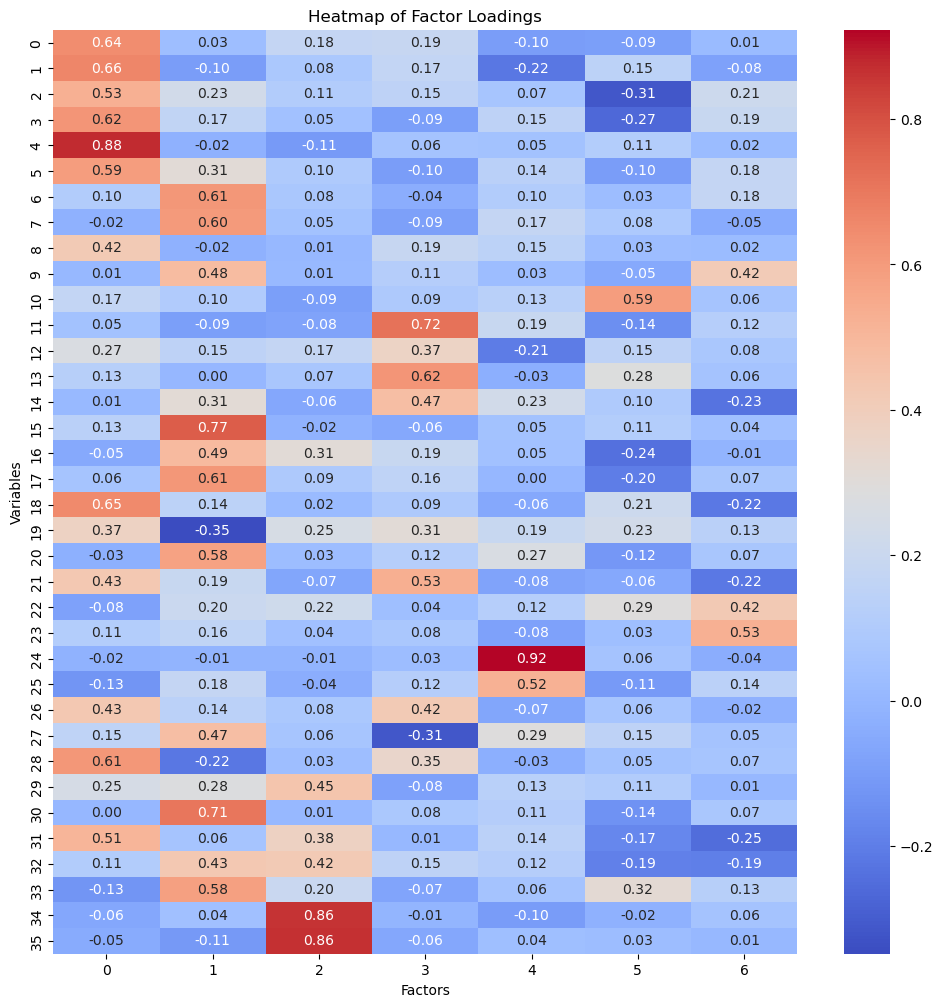

In [33]:
# The factor loadings for the 7 Factors are presented in the form of a heatmap:

fa_4 = FactorAnalyzer(n_factors=7, rotation='oblimin').fit(cluster_2)
loadings_2 = fa_4.loadings_

plt.figure(figsize=(12, 12)) 
sns.heatmap(loadings_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

In [34]:
corr_mat_factors_2 = pd.DataFrame(fa_4.phi_)
corr_mat_factors_2

# The correlation matrix between the 9 Factors themselves:

,0,1,2,3,4,5,6
0,1.000000,0.266669,0.366169,-0.132696,0.471916,0.087327,0.240585
1,0.266669,1.000000,0.308887,0.053268,0.105094,0.571539,0.034363
2,0.366169,0.308887,1.000000,-0.052243,0.151184,0.127672,0.139701
3,-0.132696,0.053268,-0.052243,1.000000,-0.040062,0.015641,-0.003407
4,0.471916,0.105094,0.151184,-0.040062,1.000000,0.061298,0.220537
5,0.087327,0.571539,0.127672,0.015641,0.061298,1.000000,-0.007298
6,0.240585,0.034363,0.139701,-0.003407,0.220537,-0.007298,1.000000


In [36]:
# Exporting the relevant data to excel:

corr_mat_factors_1.to_excel('FA_1_KMeans.xlsx')
corr_mat_factors_2.to_excel('FA_2_KMeans.xlsx')